# **Transfer Learning for flower species classification**





### **We attempt to perform flower classification into 5 species by transfer learning on a model trained to classify leaf species<br>**
**The dataset consists of 5000 images of flowers totalling 250 MB and is quite small<br>
Transfer learning would be useful here due to the dataset size**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import PIL
import keras
import os
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

import cv2
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.models import Sequential, Model, load_model
from keras.layers import Input, Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dense, Dropout, Activation, Flatten
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras import regularizers
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.layers.normalization import BatchNormalization
from keras.initializers import glorot_normal
from keras.utils import np_utils


Using TensorFlow backend.


**Unzipping and loading data**

In [0]:
path="/content/drive/My Drive/leaf_classification/dataset/"
flower_path="/content/flowers/"

In [0]:
!unzip -q "/content/drive/My Drive/flower/flowers-recognition.zip"


In [0]:
from PIL import Image
pil_im=Image.open("/content/drive/My Drive/flower/1.jpg")
img = np.asarray(pil_im)

In [0]:
def make_train_data(flower_type,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,flower_type)
        path = os.path.join(DIR,img)
        if(path[-3:]=="jpg"):
          img = cv2.imread(path,cv2.IMREAD_COLOR)
          img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
          
          X.append(np.array(img))
          Z.append(str(label))
def assign_label(img,flower_type):
    return flower_type

In [0]:
X=[]
Z=[]
IMG_SIZE=64
FLOWER_DAISY_DIR=flower_path+'daisy'
FLOWER_SUNFLOWER_DIR=flower_path+'sunflower'
FLOWER_TULIP_DIR=flower_path+'tulip'
FLOWER_DANDI_DIR=flower_path+'dandelion'
FLOWER_ROSE_DIR=flower_path+'rose'

In [11]:

make_train_data('Daisy',FLOWER_DAISY_DIR)
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip',FLOWER_TULIP_DIR)
make_train_data('Dandi',FLOWER_DANDI_DIR)
make_train_data('Rose',FLOWER_ROSE_DIR)

100%|██████████| 784/784 [00:02<00:00, 389.20it/s]


In [12]:
len(X)

4323

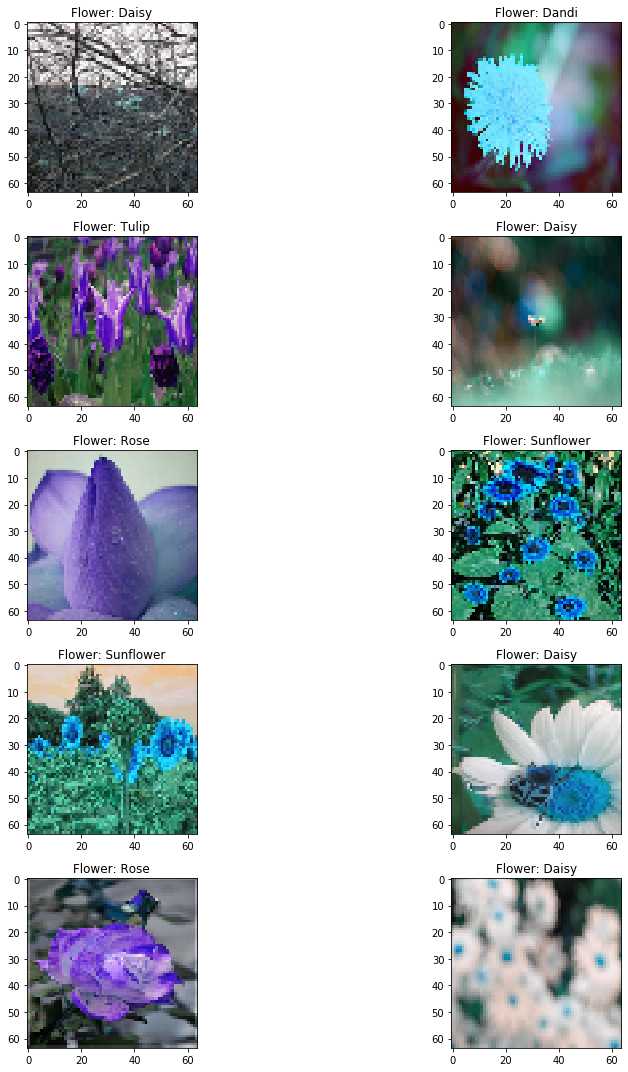

In [13]:


import random
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=random.randint(0,len(Z)-10)
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

## **Loading a model trained on leaf species classification task**

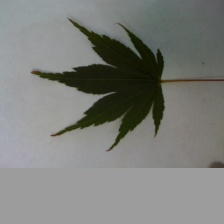

In [20]:
from IPython.display import Image
Image(filename="/content/drive/My Drive/leaf_classification/dataset/train/acer_palmatum/1249061360_0000.jpg") 


Example of image on which original network was trained to classify

In [16]:
model=load_model(path+"leafnetmodeltestaug3.h5")






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




### **Adding new layers and freezing the initial layers**

In [17]:

model.add(Dense(50, activation='relu'))
model.add(Dense(5, activation='softmax'))
for layer in model.layers[:-3]:
  layer.trainable=False
model.compile(optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)             

Though there are total 11 million parameters we only need to train 200k of them and the rest are frozen

Fitting the model on the flower species dataset

In [19]:
results = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Train on 3242 samples, validate on 1081 samples
Epoch 1/100
3242/3242 [==============================] - 1s 181us/step - loss: 1.2816 - acc: 0.4793 - val_loss: 1.2345 - val_acc: 0.4986
Epoch 2/100
3242/3242 [==============================] - 1s 177us/step - loss: 1.2797 - acc: 0.4732 - val_loss: 1.2324 - val_acc: 0.5014
Epoch 3/100
3242/3242 [==============================] - 1s 173us/step - loss: 1.2963 - acc: 0.4756 - val_loss: 1.2309 - val_acc: 0.4968
Epoch 4/100
3242/3242 [==============================] - 1s 176us/step - loss: 1.2864 - acc: 0.4707 - val_loss: 1.2332 - val_acc: 0.4949
Epoch 5/100
3242/3242 [==============================] - 1s 184us/step - loss: 1.2935 - acc: 0.4719 - val_loss: 1.2313 - val_acc: 0.4921
Epoch 6/100
3242/3242 [==============================] - 1s 177us/step - loss: 1.2774 - acc: 0.4713 - val_loss: 1.2257 - val_acc: 0.4995
Epoch 7/100
3242/3242 [==============================] - 1s 176us/step - loss: 1.2915 - acc: 0.4762 - val_loss: 1.2238 - val_acc: 

The accuracy does not go above 53% 
The model is performing poorly
Lets try changing the architecture 

### **Unfreezing more layers**

In [0]:
model2=Sequential()
for layer in model.layers[:-4]: # go through until last layer
    model2.add(layer)
for layer in model2.layers:
  layer.trainable=False

### **Adding a bigger layer**

In [33]:
#model2.add(Dense(50, activation='relu'))
model2.add(Dense(256, activation='relu'))
model2.add(Dense(5, activation='softmax'))
model2.compile(optimizer=keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 60, 60, 32)        2432      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 26, 26, 64)        51264     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 64)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 1000)             

**The accuracy increases but is still quite poor**

In [34]:
results = model2.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Train on 3242 samples, validate on 1081 samples
Epoch 1/100
3242/3242 [==============================] - 1s 299us/step - loss: 2.2216 - acc: 0.3998 - val_loss: 1.4211 - val_acc: 0.4940
Epoch 2/100
3242/3242 [==============================] - 1s 168us/step - loss: 1.4725 - acc: 0.5037 - val_loss: 1.2315 - val_acc: 0.5486
Epoch 3/100
3242/3242 [==============================] - 1s 171us/step - loss: 1.2997 - acc: 0.5271 - val_loss: 1.1493 - val_acc: 0.5874
Epoch 4/100
3242/3242 [==============================] - 1s 162us/step - loss: 1.1660 - acc: 0.5719 - val_loss: 1.1153 - val_acc: 0.5735
Epoch 5/100
3242/3242 [==============================] - 1s 166us/step - loss: 1.1184 - acc: 0.5885 - val_loss: 1.1062 - val_acc: 0.5911
Epoch 6/100
3242/3242 [==============================] - 1s 165us/step - loss: 1.0764 - acc: 0.5959 - val_loss: 1.1458 - val_acc: 0.5883
Epoch 7/100
3242/3242 [==============================] - 1s 171us/step - loss: 1.0333 - acc: 0.6228 - val_loss: 1.0793 - val_acc: 

**The model chosen is a very shallow model**<br>
Attempting to transfer learn on MobileNet trained on imagenet data






In [0]:
X=[]
Z=[]
IMG_SIZE=224
FLOWER_DAISY_DIR=flower_path+'daisy'
FLOWER_SUNFLOWER_DIR=flower_path+'sunflower'
FLOWER_TULIP_DIR=flower_path+'tulip'
FLOWER_DANDI_DIR=flower_path+'dandelion'
FLOWER_ROSE_DIR=flower_path+'rose'

In [7]:
make_train_data('Daisy',FLOWER_DAISY_DIR)
make_train_data('Sunflower',FLOWER_SUNFLOWER_DIR)
make_train_data('Tulip',FLOWER_TULIP_DIR)
make_train_data('Dandi',FLOWER_DANDI_DIR)
make_train_data('Rose',FLOWER_ROSE_DIR)

100%|██████████| 784/784 [00:02<00:00, 327.37it/s]


In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,5)
X=np.array(X)
X=X/255

In [0]:
y_train=[]

In [0]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42,shuffle=False)

In [9]:
from keras.applications.vgg16 import VGG16
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input

from keras.layers import Input
#input_tensor = Input(shape=(150, 150, 3))
#vggmodel = VGG16(weights='imagenet', include_top=False,input_tensor=Input(shape=(224, 224, 3)))
vggmodel = MobileNet(weights='imagenet',input_tensor=Input(shape=(224, 224, 3)))
vggmodel.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     

In [15]:
vggmodel.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [10]:


x = vggmodel.output
#x = GlobalAveragePooling2D()(x)
#x=Flatten()(x)
x = Dense(256, activation='relu')(x)

# and a logistic layer -- let's say we have 200 classes
predictions = Dense(5, activation='softmax')(x)

model3 = Model(inputs=vggmodel.input, outputs=predictions)

for layer in model3.layers[:-2]:
   layer.trainable = False

model3.compile(optimizer=keras.optimizers.Adam(lr=0.0003, beta_1=0.9, beta_2=0.999, epsilon=None, decay=1e-8, amsgrad=False),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model3.summary()



Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      12

In [14]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(

    rotation_range=20,

    horizontal_flip=True)   
datagen.fit(X)

# fits the model on batches with real-time data augmentation:
model3.fit_generator(datagen.flow(X, Y, batch_size=32),
                    steps_per_epoch=len(X) / 32, epochs=100)
#results = model3.fit(X, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/100
136/135 [==============================] - 48s 349ms/step - loss: 1.5721 - acc: 0.3335
Epoch 2/100
136/135 [==============================] - 41s 301ms/step - loss: 1.4444 - acc: 0.4938
Epoch 3/100
136/135 [==============================] - 41s 298ms/step - loss: 1.2830 - acc: 0.5651
Epoch 4/100
136/135 [==============================] - 40s 298ms/step - loss: 1.1323 - acc: 0.6361
Epoch 5/100
136/135 [==============================] - 41s 299ms/step - loss: 1.0263 - acc: 0.6831
Epoch 6/100
136/135 [==============================] - 40s 294ms/step - loss: 0.9522 - acc: 0.6992
Epoch 7/100
136/135 [==============================] - 40s 294ms/step - loss: 0.8957 - acc: 0.7157
Epoch 8/100
136/135 [==============================] - 40s 296ms/step - loss: 0.8364 - acc: 0.7326
Epoch 9/100
136/135 [==============================] - 40s 297ms/step - loss: 0.8227 - acc: 0.7192
Epoch 10/100


KeyboardInterrupt: ignored

As shown above the model achieves an accuracy of 80%<br>
A deeper model is able to generalise to the newer problem easily